In [5]:
import numpy as np
import pandas as pd 
import scipy.signal 
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.mixture 
sns.set()

In [2]:
start = 0
end = 45 * 60
step =  0.001
time = np.arange(start, end, step)

# Define peaks and width
intensities = np.array([400, 200, 100, 50, 25, 5])
locs = 60 * np.array([5, 10, 15, 23, 25, 32 ])
scales =np.array([15, 20, 30, 30, 20, 50])
ints = np.empty((len(locs), len(time)))

for i, loc in enumerate(locs):
    intensity = intensities[i]
    sigma = scales[i]
    signal = scipy.stats.norm(loc, sigma).pdf(time)
    signal *= signal.max()**-1
    ints[i, :] = intensity * signal

noise = np.random.normal(0, 0.01, len(time))
signal = np.sum(ints, axis=0)
# signal += noise

# Compute the derivative of the signal
deriv = np.diff(signal)
loc = np.isclose((deriv + 1), np.ones(len(deriv)))


In [7]:
model = sklearn.mixture.GaussianMixture(6).fit(signal.reshape(-1, 1))

In [9]:
logprob = model.score_samples(signal.reshape(-1, 1))
pdf = np.exp(logprob)

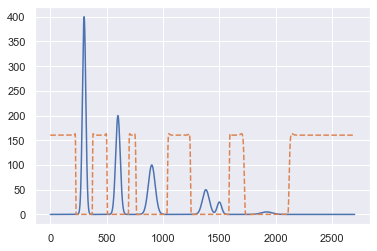

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(time, signal, '-')
ax.plot(time, pdf, '--')
# ax.plot(time[:-1][loc], deriv[loc], '.')

# ax.plot(time[peaks], signal[peaks])

2457

In [96]:
norm_sig

AttributeError: 'numpy.ndarray' object has no attribute 'median'